In [159]:
import pandas as pd
import json

import matplotlib.pyplot as mpl
import seaborn as sns

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

plotly.offline.init_notebook_mode(connected=True) 

In [160]:
fpath = "../results_formatted/data_glucose_test/kegg/2018-09-25data_glucose_test.json"


In [161]:
with open(fpath) as f:
    datajson = json.load(f)

In [162]:
datajson["stats"].keys()

[u'scope_seeds', u'scope_targets', u'scope_compounds', u'scope_reactions']

In [163]:
generations = pd.DataFrame(datajson["generations"])

In [164]:
generations = generations.transpose()

In [165]:
generations.index = generations.index.astype(int)

In [166]:
generations = generations.sort_index()

In [167]:
generations.head()

,compounds_cumulative,compounds_new,reactions_cumulative,reactions_new,targets_cumulative,targets_new
1,"[C00001, C00031]","[C00031, C00001]","[R00307, R00028, R00306, R00010]","[R00010, R00028, R00306, R00307]",[],[]
2,"[C00001, C00031, C00095, C00185, C00208, C01083]","[C00095, C00185, C00208, C01083]","[R00307, R01444, R01445, R02887, R00874, R1130...","[R01444, R01445, R02887, R00874, R11308, R1126...",[],[]
3,"[C00001, C00089, C00794, C00031, C00095, C0071...","[C00089, C00794, C00718, C00369, C06219, C0019...","[R01823, R11261, R00307, R11791, R01444, R1126...","[R01823, R11261, R11791, R11260, R03801, R0312...",[],[]
4,"[C00001, C00089, C00794, C00031, C00095, C0071...","[C00252, C02336, C02013, C00973, C02492, C0025...","[R01823, R11261, R00307, R11791, R01444, R1126...","[R11788, R08612, R01791, R03802, R11790, R0153...",[],[]
5,"[C00001, C00089, C00204, C00794, C00031, C1720...","[C00204, C17207, C00372, C21655, C06218, C21659]","[R08570, R08614, R01823, R11261, R00307, R1179...","[R08570, R08614, R02121, R11789, R05606, R0514...",[],[]


### Check if the targets columns were erroneous

#### Add map pathway data too?

#### Adding target data could be done post-processing as well

In [168]:
set(datajson["stats"]["scope_targets"])&set(generations["compounds_cumulative"][25])

set()

In [169]:
generations['compounds_cumulative'].apply(lambda x: [cpd for cpd in datajson["stats"]["scope_targets"] if cpd in x])


1     []
2     []
3     []
4     []
5     []
6     []
7     []
8     []
9     []
10    []
11    []
12    []
13    []
14    []
15    []
16    []
17    []
18    []
19    []
20    []
21    []
22    []
23    []
24    []
25    []
Name: compounds_cumulative, dtype: object

#### They don't appear to be.

### Add `n` columns

In [170]:
original_columns = generations.columns
for col in original_columns:
    generations["n_"+col] = generations[col].str.len() 

In [171]:
generations.head()

,compounds_cumulative,compounds_new,reactions_cumulative,reactions_new,targets_cumulative,targets_new,n_compounds_cumulative,n_compounds_new,n_reactions_cumulative,n_reactions_new,n_targets_cumulative,n_targets_new
1,"[C00001, C00031]","[C00031, C00001]","[R00307, R00028, R00306, R00010]","[R00010, R00028, R00306, R00307]",[],[],2,2,4,4,0,0
2,"[C00001, C00031, C00095, C00185, C00208, C01083]","[C00095, C00185, C00208, C01083]","[R00307, R01444, R01445, R02887, R00874, R1130...","[R01444, R01445, R02887, R00874, R11308, R1126...",[],[],6,4,18,14,0,0
3,"[C00001, C00089, C00794, C00031, C00095, C0071...","[C00089, C00794, C00718, C00369, C06219, C0019...","[R01823, R11261, R00307, R11791, R01444, R1126...","[R01823, R11261, R11791, R11260, R03801, R0312...",[],[],19,13,39,21,0,0
4,"[C00001, C00089, C00794, C00031, C00095, C0071...","[C00252, C02336, C02013, C00973, C02492, C0025...","[R01823, R11261, R00307, R11791, R01444, R1126...","[R11788, R08612, R01791, R03802, R11790, R0153...",[],[],30,11,46,7,0,0
5,"[C00001, C00089, C00204, C00794, C00031, C1720...","[C00204, C17207, C00372, C21655, C06218, C21659]","[R08570, R08614, R01823, R11261, R00307, R1179...","[R08570, R08614, R02121, R11789, R05606, R0514...",[],[],36,6,54,8,0,0


### Add tags if desired

In [174]:
cpds_to_tag = []
generations['tags'] = generations['compounds_new'].apply(lambda x: [cpd for cpd in cpds_to_tag if cpd in x])


## Plot

In [177]:
def cool_plots(df,line1,line2):

    # Create traces
    trace0 = go.Scatter(
        x = df.index,
        y = df[line1],
        mode = 'lines+markers+text',
        name = line1,
        text=df['tags'],
        textposition='top center'
    #     text= data['state']
    )
    trace1 = go.Scatter(
        x = df.index,
        y = df[line2],
        mode = 'lines+markers',
        name = line2
    )

    data = [trace0,trace1]
    plotly.offline.iplot(data)

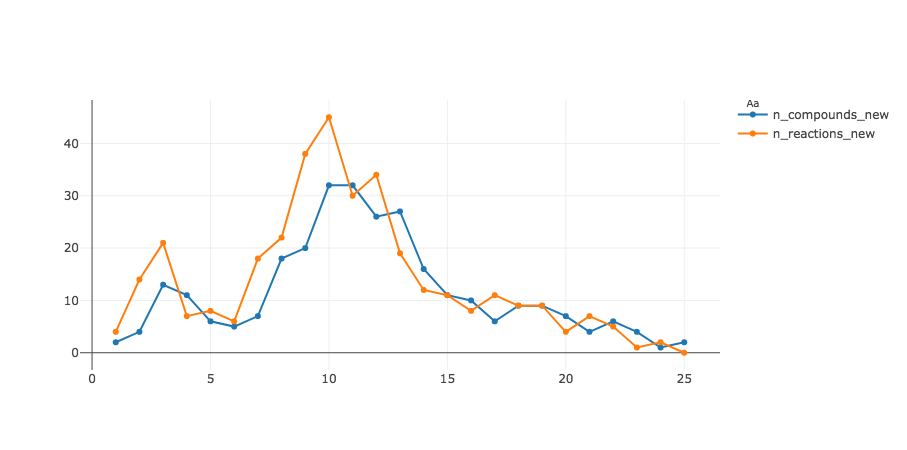

In [178]:
cool_plots(generations,'n_compounds_new','n_reactions_new')

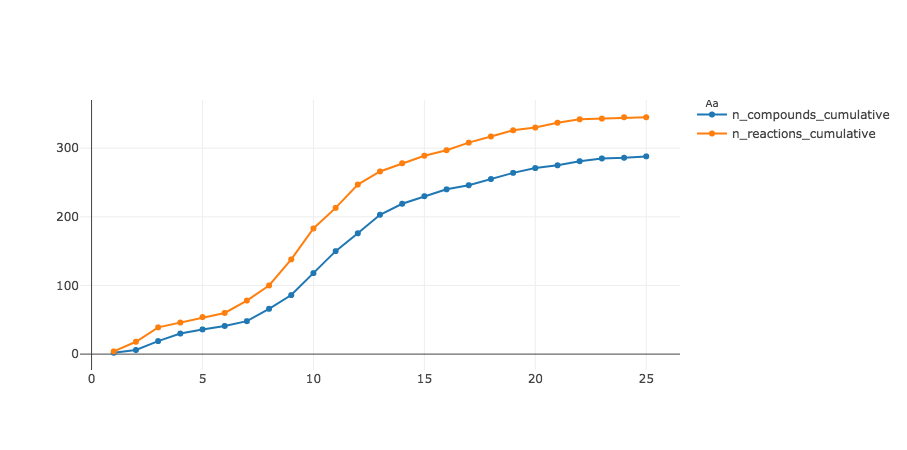

In [179]:
cool_plots(generations,'n_compounds_cumulative','n_reactions_cumulative')